Importing modules for the Reading dataframe and other modules that the eda needs for it

In [1]:
#!pip install nltk gensim
import pandas  as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn

In [2]:
!pip install pyLDAvis wordcloud textblob textstat spacy

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [3]:
df = pd.read_csv('combined_data.csv',nrows=15000)

In [4]:
df.head()

,article,summary
0,"Sally Forrest, an actress-dancer who graced th...","Sally Forrest, an actress-dancer who graced th..."
1,A middle-school teacher in China has inked hun...,Works include pictures of Presidential Palace ...
2,A man convicted of killing the father and sist...,"Iftekhar Murtaza, 29, was convicted a year ago..."
3,Avid rugby fan Prince Harry could barely watch...,Prince Harry in attendance for England's crunc...
4,A Triple M Radio producer has been inundated w...,Nick Slater's colleagues uploaded a picture to...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   article  15000 non-null  object
 1   summary  15000 non-null  object
dtypes: object(2)
memory usage: 234.5+ KB


In [6]:
df_lower = df.copy()

In [7]:
df_lower[['article','summary']] = df[['article','summary']].applymap(lambda x :x.lower())

Removing punctuations

In [8]:
import re
from nltk.tokenize import word_tokenize, sent_tokenize

In [9]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

First remove stopwords

In [10]:
def tokenize(text):
    tokens = re.split('\W+', text) #W+ means that either a word character (A-Za-z0-9_) or a dash (-) can go there.
    return tokens

In [11]:
df_lower['tokenized_article'] = df_lower['article'].apply(lambda x: tokenize(x))
df_lower['tokenized_summary'] = df_lower['summary'].apply(lambda x: tokenize(x))

In [12]:
df_lower.head()


,article,summary,tokenized_article,tokenized_summary
0,"sally forrest, an actress-dancer who graced th...","sally forrest, an actress-dancer who graced th...","[sally, forrest, an, actress, dancer, who, gra...","[sally, forrest, an, actress, dancer, who, gra..."
1,a middle-school teacher in china has inked hun...,works include pictures of presidential palace ...,"[a, middle, school, teacher, in, china, has, i...","[works, include, pictures, of, presidential, p..."
2,a man convicted of killing the father and sist...,"iftekhar murtaza, 29, was convicted a year ago...","[a, man, convicted, of, killing, the, father, ...","[iftekhar, murtaza, 29, was, convicted, a, yea..."
3,avid rugby fan prince harry could barely watch...,prince harry in attendance for england's crunc...,"[avid, rugby, fan, prince, harry, could, barel...","[prince, harry, in, attendance, for, england, ..."
4,a triple m radio producer has been inundated w...,nick slater's colleagues uploaded a picture to...,"[a, triple, m, radio, producer, has, been, inu...","[nick, slater, s, colleagues, uploaded, a, pic..."


In [13]:
nltk.download('stopwords')
from nltk.corpus import stopwords 
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopwords.words('english')]# To remove all stopwords
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
df_lower['stopped_article'] = df_lower['tokenized_article'].apply(lambda x: remove_stopwords(x))
df_lower['stopped_summary'] = df_lower['tokenized_summary'].apply(lambda x: remove_stopwords(x))

In [15]:
sp = nltk.SnowballStemmer('english')
from nltk.stem import WordNetLemmatizer
def stemming(tokenized_text):
    text = [sp.stem(word) for word in tokenized_text]
    return text


In [17]:
df_lower['stem_article'] = df_lower['stopped_article'].apply(lambda x: stemming(x))
df_lower['stem_summary'] = df_lower['stopped_summary'].apply(lambda x: stemming(x))

In [18]:
wn = nltk.WordNetLemmatizer()

def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

In [19]:
df_lower['lemma_article'] = df_lower['stopped_article'].apply(lambda x: lemmatizing(x))
df_lower['lemma_summary'] = df_lower['stopped_summary'].apply(lambda x: lemmatizing(x))

In [20]:
df_lower.head()

,article,summary,tokenized_article,tokenized_summary,stopped_article,stopped_summary,stem_article,stem_summary,lemma_article,lemma_summary
0,"sally forrest, an actress-dancer who graced th...","sally forrest, an actress-dancer who graced th...","[sally, forrest, an, actress, dancer, who, gra...","[sally, forrest, an, actress, dancer, who, gra...","[sally, forrest, actress, dancer, graced, silv...","[sally, forrest, actress, dancer, graced, silv...","[salli, forrest, actress, dancer, grace, silve...","[salli, forrest, actress, dancer, grace, silve...","[sally, forrest, actress, dancer, graced, silv...","[sally, forrest, actress, dancer, graced, silv..."
1,a middle-school teacher in china has inked hun...,works include pictures of presidential palace ...,"[a, middle, school, teacher, in, china, has, i...","[works, include, pictures, of, presidential, p...","[middle, school, teacher, china, inked, hundre...","[works, include, pictures, presidential, palac...","[middl, school, teacher, china, ink, hundr, sk...","[work, includ, pictur, presidenti, palac, yang...","[middle, school, teacher, china, inked, hundre...","[work, include, picture, presidential, palace,..."
2,a man convicted of killing the father and sist...,"iftekhar murtaza, 29, was convicted a year ago...","[a, man, convicted, of, killing, the, father, ...","[iftekhar, murtaza, 29, was, convicted, a, yea...","[man, convicted, killing, father, sister, form...","[iftekhar, murtaza, 29, convicted, year, ago, ...","[man, convict, kill, father, sister, former, g...","[iftekhar, murtaza, 29, convict, year, ago, ki...","[man, convicted, killing, father, sister, form...","[iftekhar, murtaza, 29, convicted, year, ago, ..."
3,avid rugby fan prince harry could barely watch...,prince harry in attendance for england's crunc...,"[avid, rugby, fan, prince, harry, could, barel...","[prince, harry, in, attendance, for, england, ...","[avid, rugby, fan, prince, harry, could, barel...","[prince, harry, attendance, england, crunch, m...","[avid, rugbi, fan, princ, harri, could, bare, ...","[princ, harri, attend, england, crunch, match,...","[avid, rugby, fan, prince, harry, could, barel...","[prince, harry, attendance, england, crunch, m..."
4,a triple m radio producer has been inundated w...,nick slater's colleagues uploaded a picture to...,"[a, triple, m, radio, producer, has, been, inu...","[nick, slater, s, colleagues, uploaded, a, pic...","[triple, radio, producer, inundated, messages,...","[nick, slater, colleagues, uploaded, picture, ...","[tripl, radio, produc, inund, messag, prospect...","[nick, slater, colleagu, upload, pictur, faceb...","[triple, radio, producer, inundated, message, ...","[nick, slater, colleague, uploaded, picture, f..."


In [21]:
def split_sentences(text):
    sentences = nltk.sent_tokenize(text)
    return sentences

In [22]:
stopwords = stopwords.words('english')

df_lower['article_sentence_count'] = df_lower['article'].apply(lambda x: len(split_sentences(x)))
df_lower['summary_sentence_count'] = df_lower['summary'].apply(lambda x: len(split_sentences(x)))



In [23]:
df_lower.head()

,article,summary,tokenized_article,tokenized_summary,stopped_article,stopped_summary,stem_article,stem_summary,lemma_article,lemma_summary,article_sentence_count,summary_sentence_count
0,"sally forrest, an actress-dancer who graced th...","sally forrest, an actress-dancer who graced th...","[sally, forrest, an, actress, dancer, who, gra...","[sally, forrest, an, actress, dancer, who, gra...","[sally, forrest, actress, dancer, graced, silv...","[sally, forrest, actress, dancer, graced, silv...","[salli, forrest, actress, dancer, grace, silve...","[salli, forrest, actress, dancer, grace, silve...","[sally, forrest, actress, dancer, graced, silv...","[sally, forrest, actress, dancer, graced, silv...",13,3
1,a middle-school teacher in china has inked hun...,works include pictures of presidential palace ...,"[a, middle, school, teacher, in, china, has, i...","[works, include, pictures, of, presidential, p...","[middle, school, teacher, china, inked, hundre...","[works, include, pictures, presidential, palac...","[middl, school, teacher, china, ink, hundr, sk...","[work, includ, pictur, presidenti, palac, yang...","[middle, school, teacher, china, inked, hundre...","[work, include, picture, presidential, palace,...",27,3
2,a man convicted of killing the father and sist...,"iftekhar murtaza, 29, was convicted a year ago...","[a, man, convicted, of, killing, the, father, ...","[iftekhar, murtaza, 29, was, convicted, a, yea...","[man, convicted, killing, father, sister, form...","[iftekhar, murtaza, 29, convicted, year, ago, ...","[man, convict, kill, father, sister, former, g...","[iftekhar, murtaza, 29, convict, year, ago, ki...","[man, convicted, killing, father, sister, form...","[iftekhar, murtaza, 29, convicted, year, ago, ...",19,6
3,avid rugby fan prince harry could barely watch...,prince harry in attendance for england's crunc...,"[avid, rugby, fan, prince, harry, could, barel...","[prince, harry, in, attendance, for, england, ...","[avid, rugby, fan, prince, harry, could, barel...","[prince, harry, attendance, england, crunch, m...","[avid, rugbi, fan, princ, harri, could, bare, ...","[princ, harri, attend, england, crunch, match,...","[avid, rugby, fan, prince, harry, could, barel...","[prince, harry, attendance, england, crunch, m...",25,4
4,a triple m radio producer has been inundated w...,nick slater's colleagues uploaded a picture to...,"[a, triple, m, radio, producer, has, been, inu...","[nick, slater, s, colleagues, uploaded, a, pic...","[triple, radio, producer, inundated, messages,...","[nick, slater, colleagues, uploaded, picture, ...","[tripl, radio, produc, inund, messag, prospect...","[nick, slater, colleagu, upload, pictur, faceb...","[triple, radio, producer, inundated, message, ...","[nick, slater, colleague, uploaded, picture, f...",18,3


In [24]:
def count_stopwords(text, stopwords):
    word_tokens = word_tokenize(text)
    stop_words = [word for word in word_tokens if word in stopwords]
    return len(stop_words)

In [25]:
df_lower['article_word_count'] = df_lower['article'].apply(lambda x: len(x.split()))
df_lower['summary_word_count'] = df_lower['summary'].apply(lambda x: len(x.split()))

In [26]:
df_lower.head()

,article,summary,tokenized_article,tokenized_summary,stopped_article,stopped_summary,stem_article,stem_summary,lemma_article,lemma_summary,article_sentence_count,summary_sentence_count,article_word_count,summary_word_count
0,"sally forrest, an actress-dancer who graced th...","sally forrest, an actress-dancer who graced th...","[sally, forrest, an, actress, dancer, who, gra...","[sally, forrest, an, actress, dancer, who, gra...","[sally, forrest, actress, dancer, graced, silv...","[sally, forrest, actress, dancer, graced, silv...","[salli, forrest, actress, dancer, grace, silve...","[salli, forrest, actress, dancer, grace, silve...","[sally, forrest, actress, dancer, graced, silv...","[sally, forrest, actress, dancer, graced, silv...",13,3,264,58
1,a middle-school teacher in china has inked hun...,works include pictures of presidential palace ...,"[a, middle, school, teacher, in, china, has, i...","[works, include, pictures, of, presidential, p...","[middle, school, teacher, china, inked, hundre...","[works, include, pictures, presidential, palac...","[middl, school, teacher, china, ink, hundr, sk...","[work, includ, pictur, presidenti, palac, yang...","[middle, school, teacher, china, inked, hundre...","[work, include, picture, presidential, palace,...",27,3,551,36
2,a man convicted of killing the father and sist...,"iftekhar murtaza, 29, was convicted a year ago...","[a, man, convicted, of, killing, the, father, ...","[iftekhar, murtaza, 29, was, convicted, a, yea...","[man, convicted, killing, father, sister, form...","[iftekhar, murtaza, 29, convicted, year, ago, ...","[man, convict, kill, father, sister, former, g...","[iftekhar, murtaza, 29, convict, year, ago, ki...","[man, convicted, killing, father, sister, form...","[iftekhar, murtaza, 29, convicted, year, ago, ...",19,6,465,114
3,avid rugby fan prince harry could barely watch...,prince harry in attendance for england's crunc...,"[avid, rugby, fan, prince, harry, could, barel...","[prince, harry, in, attendance, for, england, ...","[avid, rugby, fan, prince, harry, could, barel...","[prince, harry, attendance, england, crunch, m...","[avid, rugbi, fan, princ, harri, could, bare, ...","[princ, harri, attend, england, crunch, match,...","[avid, rugby, fan, prince, harry, could, barel...","[prince, harry, attendance, england, crunch, m...",25,4,580,51
4,a triple m radio producer has been inundated w...,nick slater's colleagues uploaded a picture to...,"[a, triple, m, radio, producer, has, been, inu...","[nick, slater, s, colleagues, uploaded, a, pic...","[triple, radio, producer, inundated, messages,...","[nick, slater, colleagues, uploaded, picture, ...","[tripl, radio, produc, inund, messag, prospect...","[nick, slater, colleagu, upload, pictur, faceb...","[triple, radio, producer, inundated, message, ...","[nick, slater, colleague, uploaded, picture, f...",18,3,338,36


In [27]:
df_lower['article_char_count'] = df_lower['article'].apply(lambda x: len(x.replace(" ", "")))
df_lower['summary_char_count'] = df_lower['summary'].apply(lambda x: len(x.replace(" ", "")))

In [29]:
df_lower['article_word_density'] = df_lower['article_word_count'] / (df_lower['article_char_count'] + 1)
df_lower['summary_word_density'] = df_lower['summary_word_count'] / (df_lower['summary_char_count'] + 1)


In [30]:
df_lower['article_sentence_density'] = df_lower['article_sentence_count'] / (df_lower['article_word_count'] + 1)
df_lower['summary_sentence_density'] = df_lower['summary_sentence_count'] / (df_lower['summary_word_count'] + 1)

In [35]:
import string
punc = string.punctuation
df_lower['article_punctuation_count'] = df_lower['article'].apply(lambda x: len([a for a in x if a in punc]))
df_lower['summary_punctuation_count'] = df_lower['summary'].apply(lambda x: len([a for a in x if a in punc]))

In [36]:
df_lower['article_stopwords_count'] = df_lower['article'].apply(lambda x: count_stopwords(x, stopwords))
df_lower['summary_stopwords_count'] = df_lower['summary'].apply(lambda x: count_stopwords(x, stopwords))


In [38]:
df_lower['article_stopwords_density'] = df_lower['article_stopwords_count'] / (df_lower['article_word_count'] + 1)
df_lower['summary_stopwords_density'] = df_lower['summary_stopwords_count'] / (df_lower['summary_word_count'] + 1)

In [39]:
df_lower.head()

,article,summary,tokenized_article,tokenized_summary,stopped_article,stopped_summary,stem_article,stem_summary,lemma_article,lemma_summary,...,article_word_density,summary_word_density,article_sentence_density,summary_sentence_density,article_punctuation_count,summary_punctuation_count,article_stopwords_count,summary_stopwords_count,article_stopwords_density,summary_stopwords_density
0,"sally forrest, an actress-dancer who graced th...","sally forrest, an actress-dancer who graced th...","[sally, forrest, an, actress, dancer, who, gra...","[sally, forrest, an, actress, dancer, who, gra...","[sally, forrest, actress, dancer, graced, silv...","[sally, forrest, actress, dancer, graced, silv...","[salli, forrest, actress, dancer, grace, silve...","[salli, forrest, actress, dancer, grace, silve...","[sally, forrest, actress, dancer, graced, silv...","[sally, forrest, actress, dancer, graced, silv...",...,0.202299,0.207885,0.049057,0.050847,52,11,94,17,0.354717,0.288136
1,a middle-school teacher in china has inked hun...,works include pictures of presidential palace ...,"[a, middle, school, teacher, in, china, has, i...","[works, include, pictures, of, presidential, p...","[middle, school, teacher, china, inked, hundre...","[works, include, pictures, presidential, palac...","[middl, school, teacher, china, ink, hundr, sk...","[work, includ, pictur, presidenti, palac, yang...","[middle, school, teacher, china, inked, hundre...","[work, include, picture, presidential, palace,...",...,0.212659,0.218182,0.048913,0.081081,90,4,233,10,0.422101,0.270270
2,a man convicted of killing the father and sist...,"iftekhar murtaza, 29, was convicted a year ago...","[a, man, convicted, of, killing, the, father, ...","[iftekhar, murtaza, 29, was, convicted, a, yea...","[man, convicted, killing, father, sister, form...","[iftekhar, murtaza, 29, convicted, year, ago, ...","[man, convict, kill, father, sister, former, g...","[iftekhar, murtaza, 29, convict, year, ago, ki...","[man, convicted, killing, father, sister, form...","[iftekhar, murtaza, 29, convicted, year, ago, ...",...,0.199143,0.195540,0.040773,0.052174,79,22,188,42,0.403433,0.365217
3,avid rugby fan prince harry could barely watch...,prince harry in attendance for england's crunc...,"[avid, rugby, fan, prince, harry, could, barel...","[prince, harry, in, attendance, for, england, ...","[avid, rugby, fan, prince, harry, could, barel...","[prince, harry, attendance, england, crunch, m...","[avid, rugbi, fan, princ, harri, could, bare, ...","[princ, harri, attend, england, crunch, match,...","[avid, rugby, fan, prince, harry, could, barel...","[prince, harry, attendance, england, crunch, m...",...,0.215453,0.209016,0.043029,0.076923,93,9,220,13,0.378657,0.250000
4,a triple m radio producer has been inundated w...,nick slater's colleagues uploaded a picture to...,"[a, triple, m, radio, producer, has, been, inu...","[nick, slater, s, colleagues, uploaded, a, pic...","[triple, radio, producer, inundated, messages,...","[nick, slater, colleagues, uploaded, picture, ...","[tripl, radio, produc, inund, messag, prospect...","[nick, slater, colleagu, upload, pictur, faceb...","[triple, radio, producer, inundated, message, ...","[nick, slater, colleague, uploaded, picture, f...",...,0.208900,0.191489,0.053097,0.081081,72,7,136,11,0.401180,0.297297


In [41]:
article_columns = df_lower[['article_sentence_count', 'article_word_count', 'article_char_count',
                             'article_word_density', 'article_sentence_density',
                             'article_punctuation_count', 'article_stopwords_count']]
summary_columns = df_lower[['summary_sentence_count', 'summary_word_count', 'summary_char_count',
                             'summary_word_density', 'summary_sentence_density',
                             'summary_punctuation_count', 'summary_stopwords_count']]


In [45]:
article_columns.describe()

,article_sentence_count,article_word_count,article_char_count,article_word_density,article_sentence_density,article_punctuation_count,article_stopwords_count
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,32.684933,677.445400,3258.187133,0.208043,0.048149,107.594067,289.843200
std,18.587549,341.855658,1643.604104,0.010734,0.010381,62.148184,153.115575
min,1.000000,41.000000,205.000000,0.151656,0.017895,4.000000,16.000000
25%,19.000000,417.000000,2012.000000,0.200775,0.041504,62.000000,175.000000
50%,28.000000,610.000000,2933.000000,0.207919,0.046563,94.000000,259.000000
75%,42.000000,868.250000,4175.000000,0.215171,0.052729,139.000000,374.000000
max,170.000000,1917.000000,9496.000000,0.250000,0.155251,544.000000,966.000000


In [46]:
summary_columns.describe()

,summary_sentence_count,summary_word_count,summary_char_count,summary_word_density,summary_sentence_density,summary_punctuation_count,summary_stopwords_count
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,3.967467,57.252000,271.644267,0.210224,0.070457,8.392133,19.620800
std,1.473189,25.232339,120.339728,0.016455,0.014165,4.501020,10.960776
min,1.000000,10.000000,42.000000,0.138211,0.013158,1.000000,1.000000
25%,3.000000,41.000000,190.000000,0.199170,0.061224,5.000000,13.000000
50%,4.000000,53.000000,249.000000,0.210031,0.073171,8.000000,18.000000
75%,5.000000,68.000000,318.000000,0.221053,0.080000,10.000000,24.000000
max,77.000000,1440.000000,7134.000000,0.280488,0.161290,188.000000,627.000000


In [85]:
# create helper functions to draw box plot and histograms
def plot_box_plots(data, columns, num_rows=2, num_cols=3):
    

    # Calculate the total number of plots needed
    total_plots = num_rows * num_cols

    # Create a subplot grid to accommodate the specified number of columns
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 4))
    axes = axes.flatten()

    # Plot box plots for each column in the specified list
    for i, col in enumerate(columns):
        if i < total_plots:
            ax = axes[i]
            ax.boxplot(data[col], vert=True)
            ax.set_title(col.replace("_", " "))
            ax.set_xlabel("Value")

    # Hide any remaining empty subplots (if there are fewer columns than total_plots)
    for i in range(len(columns), total_plots):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

def plot_histograms(data, num_rows=None, num_cols=None):
   
    # Get the column names from the DataFrame
    columns = data.columns

    # Calculate the number of rows and columns for the subplots
    if num_rows is None and num_cols is None:
        num_rows = int(len(columns) ** 0.5)
        num_cols = (len(columns) + num_rows - 1) // num_rows
    elif num_rows is None:
        num_rows = (len(columns) + num_cols - 1) // num_cols
    elif num_cols is None:
        num_cols = (len(columns) + num_rows - 1) // num_rows

    # Create subplots
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 4))

    # Flatten the axes array to easily iterate over each subplot
    axes = axes.flatten()

    # Plot histograms for each column on the corresponding subplot
    for i, col in enumerate(columns):
        if i < len(columns):
            ax = axes[i]
            ax.hist(data[col], bins=100)
            ax.set_title(col.replace("_", " "))
            ax.set_xlabel("Value")
            ax.set_ylabel("Frequency")

    # Hide any remaining empty subplots
    for i in range(len(columns), num_rows * num_cols):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()


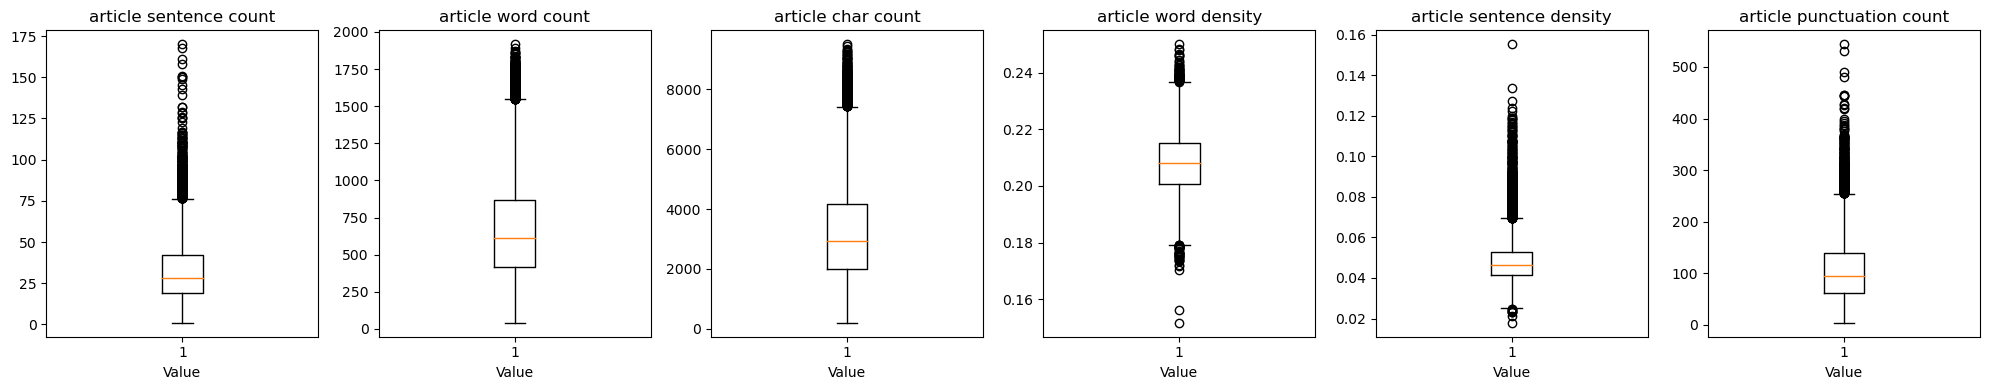

In [87]:
# select article related columns
article_columns_to_plot= ['article_sentence_count', 'article_word_count', 'article_char_count','article_word_density',
                          'article_sentence_density', 'article_punctuation_count', 'article_stopwords_count']
# box plot
plot_box_plots(df_lower, article_columns_to_plot, num_rows=1, num_cols=6)

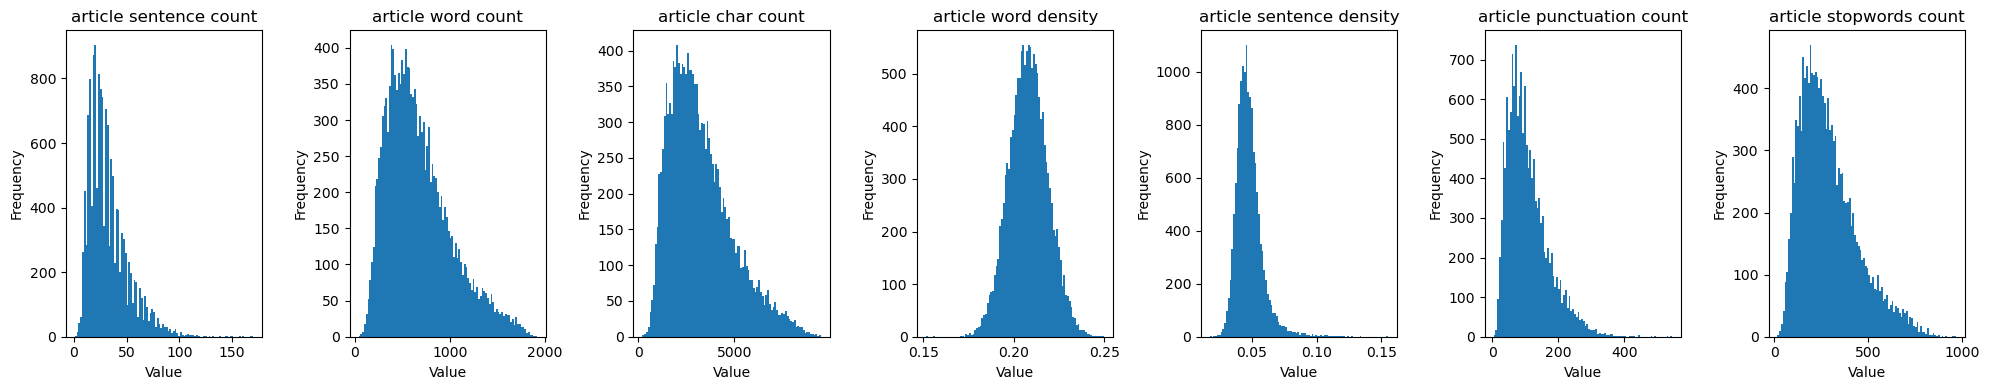

In [88]:
# plot histograms for the article columns
plot_histograms(article_columns, num_rows=1, num_cols=7)

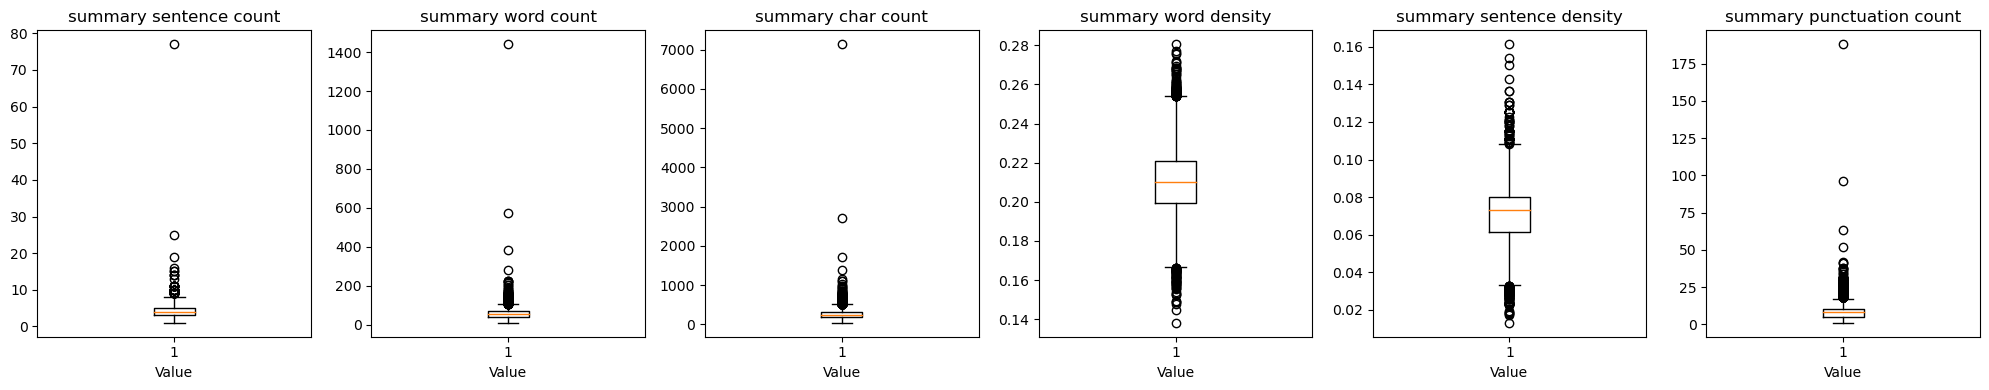

In [89]:
# select article related columns
summary_columns_to_plot= ['summary_sentence_count', 'summary_word_count', 'summary_char_count','summary_word_density',
                          'summary_sentence_density', 'summary_punctuation_count', 'summary_stopwords_count']
# box plot
plot_box_plots(df_lower, summary_columns_to_plot, num_rows=1, num_cols=6)

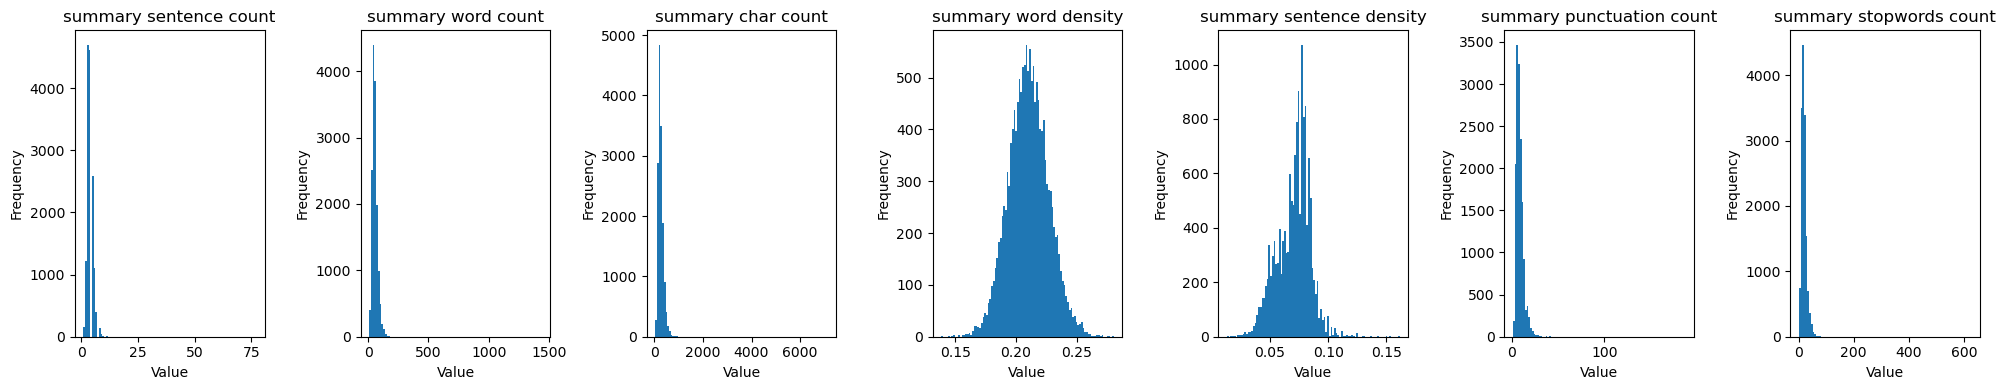

In [90]:
# plot histograms for the article columns
plot_histograms(summary_columns, num_rows=1, num_cols=7)

In [91]:
!pip install textblob
from textblob import TextBlob

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [92]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
     

In [93]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [94]:
df_lower['article_subjectivity'] = df_lower['article'].apply(getSubjectivity)
df_lower['summary_subjectivity'] = df_lower['summary'].apply(getSubjectivity)

In [95]:
df_lower['Polarity_article'] = df_lower['article'].apply(getPolarity)
df_lower['Polarity_summary'] = df_lower['summary'].apply(getPolarity)

In [96]:
df_lower.head()

,article,summary,tokenized_article,tokenized_summary,stopped_article,stopped_summary,stem_article,stem_summary,lemma_article,lemma_summary,...,article_stopwords_count,summary_stopwords_count,article_stopwords_density,summary_stopwords_density,article_subjectivity,summary_subjectivity,Polarity_article,Polarity_summary,Label_article,Label_summary
0,"sally forrest, an actress-dancer who graced th...","sally forrest, an actress-dancer who graced th...","[sally, forrest, an, actress, dancer, who, gra...","[sally, forrest, an, actress, dancer, who, gra...","[sally, forrest, actress, dancer, graced, silv...","[sally, forrest, actress, dancer, graced, silv...","[salli, forrest, actress, dancer, grace, silve...","[salli, forrest, actress, dancer, grace, silve...","[sally, forrest, actress, dancer, graced, silv...","[sally, forrest, actress, dancer, graced, silv...",...,94,17,0.354717,0.288136,0.406790,0.400000,0.086728,-0.050000,Pos,Neg
1,a middle-school teacher in china has inked hun...,works include pictures of presidential palace ...,"[a, middle, school, teacher, in, china, has, i...","[works, include, pictures, of, presidential, p...","[middle, school, teacher, china, inked, hundre...","[works, include, pictures, presidential, palac...","[middl, school, teacher, china, ink, hundr, sk...","[work, includ, pictur, presidenti, palac, yang...","[middle, school, teacher, china, inked, hundre...","[work, include, picture, presidential, palace,...",...,233,10,0.422101,0.270270,0.568279,0.066667,0.207300,0.000000,Pos,Neu
2,a man convicted of killing the father and sist...,"iftekhar murtaza, 29, was convicted a year ago...","[a, man, convicted, of, killing, the, father, ...","[iftekhar, murtaza, 29, was, convicted, a, yea...","[man, convicted, killing, father, sister, form...","[iftekhar, murtaza, 29, convicted, year, ago, ...","[man, convict, kill, father, sister, former, g...","[iftekhar, murtaza, 29, convict, year, ago, ki...","[man, convicted, killing, father, sister, form...","[iftekhar, murtaza, 29, convicted, year, ago, ...",...,188,42,0.403433,0.365217,0.259117,0.460000,0.024906,-0.190000,Pos,Neg
3,avid rugby fan prince harry could barely watch...,prince harry in attendance for england's crunc...,"[avid, rugby, fan, prince, harry, could, barel...","[prince, harry, in, attendance, for, england, ...","[avid, rugby, fan, prince, harry, could, barel...","[prince, harry, attendance, england, crunch, m...","[avid, rugbi, fan, princ, harri, could, bare, ...","[princ, harri, attend, england, crunch, match,...","[avid, rugby, fan, prince, harry, could, barel...","[prince, harry, attendance, england, crunch, m...",...,220,13,0.378657,0.250000,0.537618,0.250000,0.149097,0.400000,Pos,Pos
4,a triple m radio producer has been inundated w...,nick slater's colleagues uploaded a picture to...,"[a, triple, m, radio, producer, has, been, inu...","[nick, slater, s, colleagues, uploaded, a, pic...","[triple, radio, producer, inundated, messages,...","[nick, slater, colleagues, uploaded, picture, ...","[tripl, radio, produc, inund, messag, prospect...","[nick, slater, colleagu, upload, pictur, faceb...","[triple, radio, producer, inundated, message, ...","[nick, slater, colleague, uploaded, picture, f...",...,136,11,0.401180,0.297297,0.480303,0.533333,0.237311,0.166667,Pos,Pos


In [97]:
def Label(score):
    if score > 0:
        return 'Pos'
    elif score == 0:
        return 'Neu'
    else:
        return 'Neg'

In [98]:
df_lower['Label_article'] = df_lower['Polarity_article'].apply(Label)
df_lower['Label_summary'] = df_lower['Polarity_summary'].apply(Label)

In [99]:
df_lower.head()

,article,summary,tokenized_article,tokenized_summary,stopped_article,stopped_summary,stem_article,stem_summary,lemma_article,lemma_summary,...,article_stopwords_count,summary_stopwords_count,article_stopwords_density,summary_stopwords_density,article_subjectivity,summary_subjectivity,Polarity_article,Polarity_summary,Label_article,Label_summary
0,"sally forrest, an actress-dancer who graced th...","sally forrest, an actress-dancer who graced th...","[sally, forrest, an, actress, dancer, who, gra...","[sally, forrest, an, actress, dancer, who, gra...","[sally, forrest, actress, dancer, graced, silv...","[sally, forrest, actress, dancer, graced, silv...","[salli, forrest, actress, dancer, grace, silve...","[salli, forrest, actress, dancer, grace, silve...","[sally, forrest, actress, dancer, graced, silv...","[sally, forrest, actress, dancer, graced, silv...",...,94,17,0.354717,0.288136,0.406790,0.400000,0.086728,-0.050000,Pos,Neg
1,a middle-school teacher in china has inked hun...,works include pictures of presidential palace ...,"[a, middle, school, teacher, in, china, has, i...","[works, include, pictures, of, presidential, p...","[middle, school, teacher, china, inked, hundre...","[works, include, pictures, presidential, palac...","[middl, school, teacher, china, ink, hundr, sk...","[work, includ, pictur, presidenti, palac, yang...","[middle, school, teacher, china, inked, hundre...","[work, include, picture, presidential, palace,...",...,233,10,0.422101,0.270270,0.568279,0.066667,0.207300,0.000000,Pos,Neu
2,a man convicted of killing the father and sist...,"iftekhar murtaza, 29, was convicted a year ago...","[a, man, convicted, of, killing, the, father, ...","[iftekhar, murtaza, 29, was, convicted, a, yea...","[man, convicted, killing, father, sister, form...","[iftekhar, murtaza, 29, convicted, year, ago, ...","[man, convict, kill, father, sister, former, g...","[iftekhar, murtaza, 29, convict, year, ago, ki...","[man, convicted, killing, father, sister, form...","[iftekhar, murtaza, 29, convicted, year, ago, ...",...,188,42,0.403433,0.365217,0.259117,0.460000,0.024906,-0.190000,Pos,Neg
3,avid rugby fan prince harry could barely watch...,prince harry in attendance for england's crunc...,"[avid, rugby, fan, prince, harry, could, barel...","[prince, harry, in, attendance, for, england, ...","[avid, rugby, fan, prince, harry, could, barel...","[prince, harry, attendance, england, crunch, m...","[avid, rugbi, fan, princ, harri, could, bare, ...","[princ, harri, attend, england, crunch, match,...","[avid, rugby, fan, prince, harry, could, barel...","[prince, harry, attendance, england, crunch, m...",...,220,13,0.378657,0.250000,0.537618,0.250000,0.149097,0.400000,Pos,Pos
4,a triple m radio producer has been inundated w...,nick slater's colleagues uploaded a picture to...,"[a, triple, m, radio, producer, has, been, inu...","[nick, slater, s, colleagues, uploaded, a, pic...","[triple, radio, producer, inundated, messages,...","[nick, slater, colleagues, uploaded, picture, ...","[tripl, radio, produc, inund, messag, prospect...","[nick, slater, colleagu, upload, pictur, faceb...","[triple, radio, producer, inundated, message, ...","[nick, slater, colleague, uploaded, picture, f...",...,136,11,0.401180,0.297297,0.480303,0.533333,0.237311,0.166667,Pos,Pos


<Axes: xlabel='Polarity_article', ylabel='Count'>

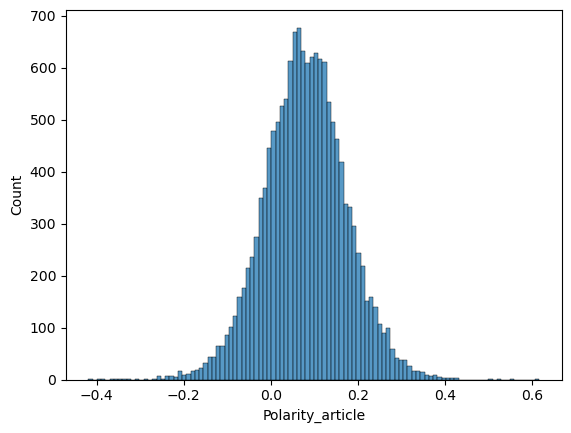

In [116]:
sns.histplot(data=df_lower['Polarity_article'])

<Axes: xlabel='Polarity_summary', ylabel='Count'>

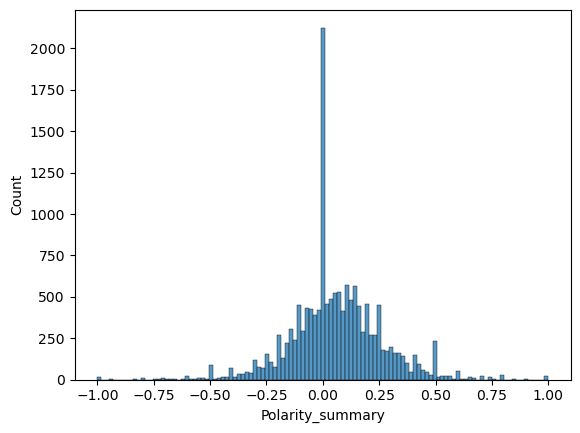

In [119]:
sns.histplot(data=df_lower['Polarity_summary'])

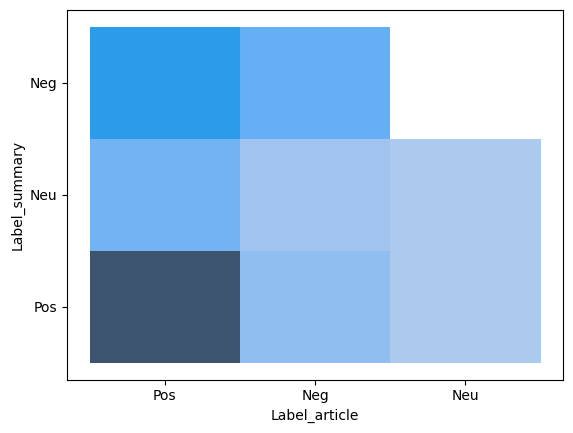

In [135]:
histplot = sns.histplot(data=df_lower,x= 'Label_article',y = 'Label_summary')

In [136]:
fig = histplot.get_figure()
fig.savefig('Label Histogram')

In [137]:
df_lower.to_csv('Sentiment_eda.csv')